# Exploratory Data Analysis

### Submission Details<br>
Joshua Rommel Hayag VARGAS (A0209713H)<br>
YSC4224 Applied Data Science

## Import libraries

In [1]:
# Pandas and numpy
import pandas as pd
import numpy as np

# On top of the required libraries for this course,
# I installed in my 'ysc4224 environment' additional libraries:
# matplotlib and seaborn for data visualisation,
# and scipy and sklearn for automating some EDA tasks.

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn as sklearn

# openpyxl - dependency for reading excel
import openpyxl

## Import data

In [2]:
df = pd.read_excel(r'telco_customer_churn.xlsx', sheet_name='telco_customer_churn')
df.head(10)

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Dataset overview

Let's first understand the overall characteristics of the dataset: the shape, the column types, descriptive statistics (if applicable), and if there are missing values.

In [148]:
# Looking at the database shape
df.shape

(7043, 21)

There are 7043 entries and 21 features in this dataset.

In [147]:
# Seeing dtypes
df.dtypes

customer_ID           object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_Service         object
multiple_lines        object
internet              object
security_online       object
backup_online         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract_type         object
paperless_billing     object
payment_mode          object
charges_per_month    float64
charges_total         object
churn                 object
dtype: object

Most columns appear to be objects. The object dtype can be useful, but this means that we have to examine the column content to make sure that it is consistent.

In [149]:
df.describe()

,senior_citizen,tenure,charges_per_month
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


There are three columns that are currently in numeric data types: `senior_citizen`, `tenure`, and `charges_per_month`. However, we will see later that another column is numeric in nature, while one of these columns is not to be treated as a numeric variable.

In [153]:
# Checking for missing values
df.isna().sum()

customer_ID          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_Service        0
multiple_lines       0
internet             0
security_online      0
backup_online        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract_type        0
paperless_billing    0
payment_mode         0
charges_per_month    0
charges_total        0
churn                0
dtype: int64

There are 0 null values, however this does not necessarily mean that all values are usable. We will see later if there are values that need cleaning.

## Univariate analysis

In this section, we will look at each of the columns in the dataframe, get to know their contents, and see if any adjustments have to be made to dataframe content (cleaning, standardisation etc.)

#### `customer_ID`

In [16]:
# Sample of column entries
df['customer_ID'].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customer_ID, dtype: object

We can see that column `customer_ID` is supposed to be a unique identifier, so there isn't much in terms of visualising distribution, etc. we can do with this column. However, we should check to see if there are any duplicates.

In [25]:
# Checking for duplicates
len(df['customer_ID']) - len(df['customer_ID'].drop_duplicates()) 

0

We should also check to see if values in `customer_ID` are of consistent length, just in case.

In [199]:
df['customer_ID'].str.len().value_counts()

10    7043
Name: customer_ID, dtype: int64

They seem to be, so this column should be usable (but c)

#### `gender`

In [43]:
# Sample of column entries
df['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

This appears to be a column with values pertaining to the customer's gender. Let's see the unique values in the column and their distribution by using `value_counts()`.

In [154]:
# Distribution of values
df['gender'].value_counts()

Male                 3553
Female               3484
Prefer not to say       6
Name: gender, dtype: int64

In [157]:
# Distribution of values as percentage of all entries
df['gender'].value_counts() / len(df) * 100

Male                 50.447253
Female               49.467556
Prefer not to say     0.085191
Name: gender, dtype: float64

<AxesSubplot: >

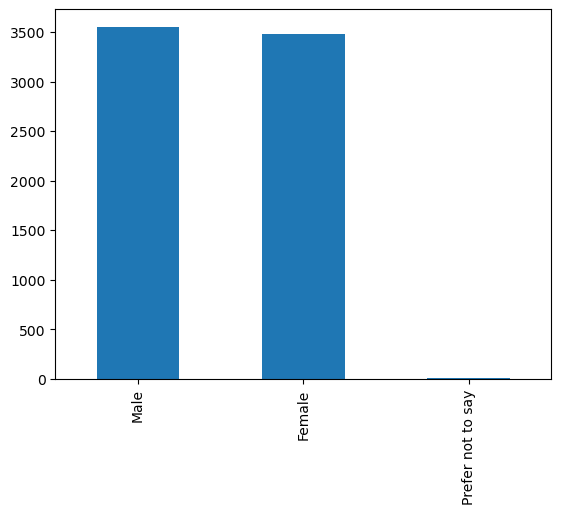

In [69]:
# Plotting the distribution of values
df['gender'].value_counts().plot.bar()

There appears to be a fairly even gender distribution in this dataset.

#### `senior_citizen`

In [71]:
# Sample of column entries
df['senior_citizen'].tail()

7038    0
7039    0
7040    0
7041    1
7042    0
Name: senior_citizen, dtype: int64

This appears to be a column with values pertaining to the customer's senior citizen status. **Interestingly, this column has the `int64` datatype, even though the information appears to be categorical/boolean in nature.** Let's see the unique values in the column and their distribution by using `value_counts()`.

In [75]:
# Distribution of values
df['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [158]:
# Distribution of values as percentage of all entries
df['senior_citizen'].value_counts() / len(df) * 100

0    83.785319
1    16.214681
Name: senior_citizen, dtype: float64

<AxesSubplot: >

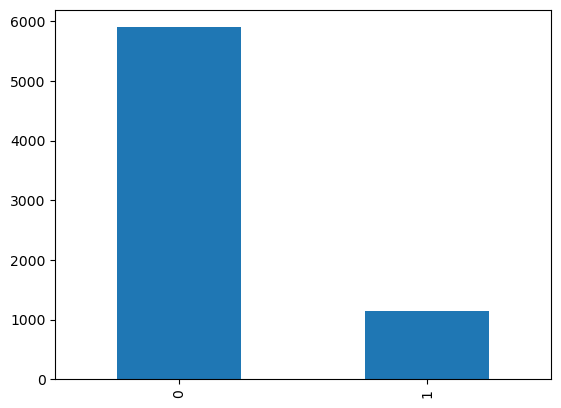

In [76]:
# Plotting the distribution of values
df['senior_citizen'].value_counts().plot.bar()

It appears that 16.2% of the respondents are senior citizens, with the remaining not having senior citizen status.

#### `partner`

In [84]:
# Sample of column entries
df['partner'].head()

0    Yes
1     No
2     No
3     No
4     No
Name: partner, dtype: object

This appears to be a column with values recording if the customer has a partner. **This column's values also appear to indicate if something is true or false, but uses the `object` dtype instead of `int64` like `senior_citizen.`** Let's look at the datatype of the first object:

In [178]:
type(df['partner'].values.item(0))

str

Let's see if this is true for all items. I will define a function `typecheck` that we can use later in this notebook.

In [69]:
def typecheck(data, type_query, error_msg=True):
    """
    A function that checks if all entries in a dataframe column are of a certain type.
    Written because I could not find something in the Pandas documentation that gives me
    value types aside from the column type, which is frustrating if column dtype is 'O.'
    Would love to know if something else exists.

    data - Pandas series, or dataframe column if entered as df['column']
    
    type_query - dtype, as type str

    
    """
    count = 0
    type_ = np.dtype(type_query)
    for i in range(len(data.values)):
        if type(data.values.item(i)) == type_:
            count = count + 1
        else:
            if error_msg == True:
                print('There is an item in position ' + str(i) + ' with value ' + str(data.values.item(i)) + ' and type ' + str(type(data.values.item(i))))
    print(str(count) + ' items are type ' + type_query + ', out of ' + str(len(data)))


In [70]:
# Checking if this is the case for 
typecheck(df['partner'], 'str')

7043 items are type str, out of 7043


All items are of type `str`. Let's see the unique values in the column and their distribution by using `value_counts()`.

In [85]:
# Distribution of values
df['partner'].value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [6]:
# Distribution of values as percentage of all entries
df['partner'].value_counts() / len(df) * 100

No     51.69672
Yes    48.30328
Name: partner, dtype: float64

<AxesSubplot: >

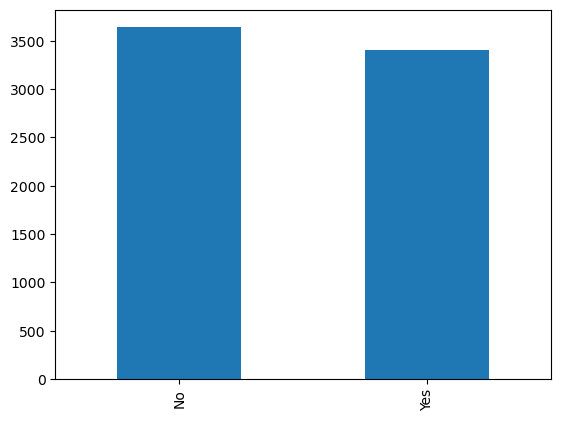

In [7]:
# Plotting the distribution of values
df['partner'].value_counts().plot.bar()

The customer base is fairly evenly split between customers who have partners and those who do not.

#### `dependents`

In [88]:
# Sample of column entries
df['dependents'].head()

0    No
1    No
2    No
3    No
4    No
Name: dependents, dtype: object

This appears to be another Yes/No column pertaining to whether or not customers have dependents. This likely usually applies to children. We can confirm that all entries are string:

In [53]:
typecheck(df['dependents'], 'str')

7043 items are type str, out of 7043


Let's look at unique values and distribution:

In [89]:
# Distribution of values
df['dependents'].value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

In [11]:
# Distribution of values as percentage of all entries
df['dependents'].value_counts() / len(df) * 100

No     70.041176
Yes    29.958824
Name: dependents, dtype: float64

<AxesSubplot: >

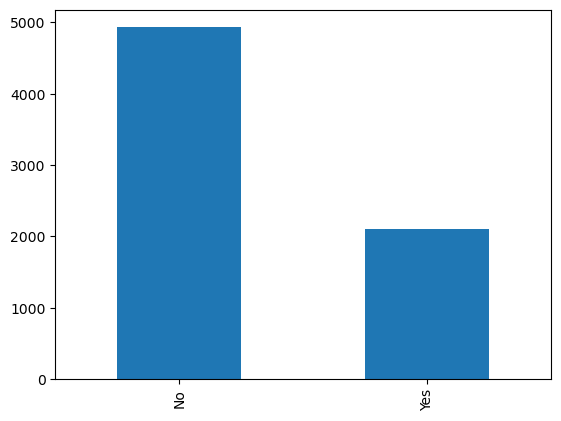

In [90]:
# Plotting the distribution of values
df['dependents'].value_counts().plot.bar()

It appears that most customers do not have dependents, with only 30% of customers reporting that they do.

#### `tenure`

In [12]:
# Sample of column entries
df['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

This appears to be our first **numeric** column, with a dtype of `int64`. This probably refers to the number of units of time that customers have been engaged with the telco, which I imagine to be months as customers are usually billed monthly. We know from earlier that there are no misnullsing values in this column, so let's get some descriptive statistics to have an idea of the values' range and variability.

In [14]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

`min` appears to be 0, so let's check how many values are 0 in this dataset:

In [14]:
print('There are ' + str(len(df[df['tenure'] == 0]['tenure'])) + ' rows which have a tenure value at 0, which is ' + str(len(df[df['tenure'] == 0]['tenure']) / len(df) * 100) + '% of all rows.')

There are 11 rows which have a tenure value at 0, which is 0.1561834445548772% of all rows.


**What does it mean for a customer to have a tenure of 0 months?** It is possible these customers have not yet been billed once.

Let's see the distribution of values across the dataset.

<AxesSubplot: xlabel='tenure', ylabel='Count'>

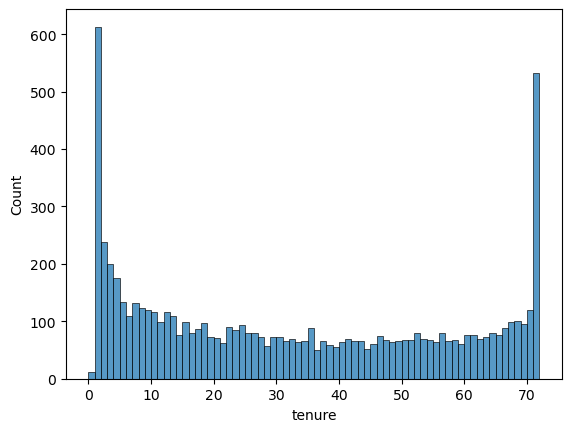

In [19]:
sns.histplot(data=(df['tenure']), binwidth=1)

The distribution is U-shaped, but not symmetrical. It appears to have a high number of customers who are on 1 month of tenure and a similarly (if not as) high number of customers having 72 months of tenure. This makes me wonder: why are there so many customers who are listed as having 72 months of tenure? Is it possible many of them stayed with the telco for longer than 72 months?

(Frankly, my puzzlement be partly due to my lack of experience with telco contracts, as during my time in Singapore I've always subscribe to no-contract MVNOs and I imagine churn rate is very high as it is very easy to switch telcos.)

In [13]:

print('There are ' + str(len(df[df['tenure'] >= 71]['tenure'])) + ' rows which have a tenure value at or above 71, which is ' + str(len(df[df['tenure'] >= 71]['tenure']) / len(df) * 100) + '% of all rows.')
print('There are ' + str(len(df[df['tenure'] == 72]['tenure'])) + ' rows which have a tenure value of 72, which is ' + str(len(df[df['tenure'] == 72]['tenure']) / len(df) * 100) + '* of all rows and ' + str(len(df[df['tenure'] == 72]['tenure']) / len(df[df['tenure'] >= 71]['tenure']) * 100) + '* of values at or above 71.')

There are 532 rows which have a tenure value at or above 71, which is 7.553599318472242% of all rows.
There are 362 rows which have a tenure value of 72, which is 5.139855175351412* of all rows and 68.04511278195488* of values at or above 71.


<AxesSubplot: xlabel='tenure', ylabel='Count'>

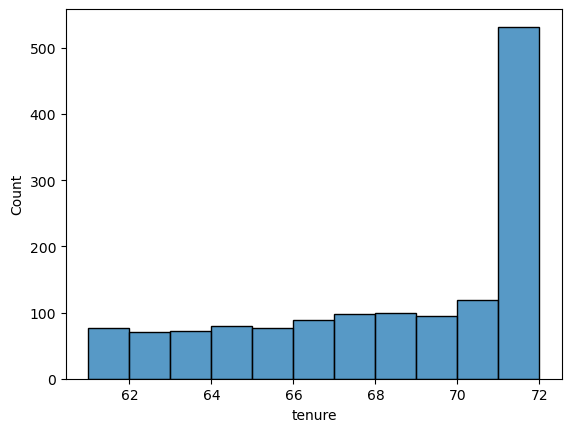

In [27]:
sns.histplot(data=(df[df['tenure'] > 60]['tenure']), binwidth=1)

Let's calculate skewness:

In [50]:
df['tenure'].skew()

0.2395397495619829

The distribution is positively skewed, or skewed to the left.

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [51]:
scipy.stats.kurtosis(df['tenure'])

-1.3872386910324277

Kurtosis is negative, indicating that the distribution is relatively flat.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

{'whiskers': [<matplotlib.lines.Line2D at 0x177220ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x177221000>,
 'boxes': [<matplotlib.lines.Line2D at 0x177220820>],
 'medians': [<matplotlib.lines.Line2D at 0x177221420>],
 'fliers': [<matplotlib.lines.Line2D at 0x1772216c0>],
 'means': []}

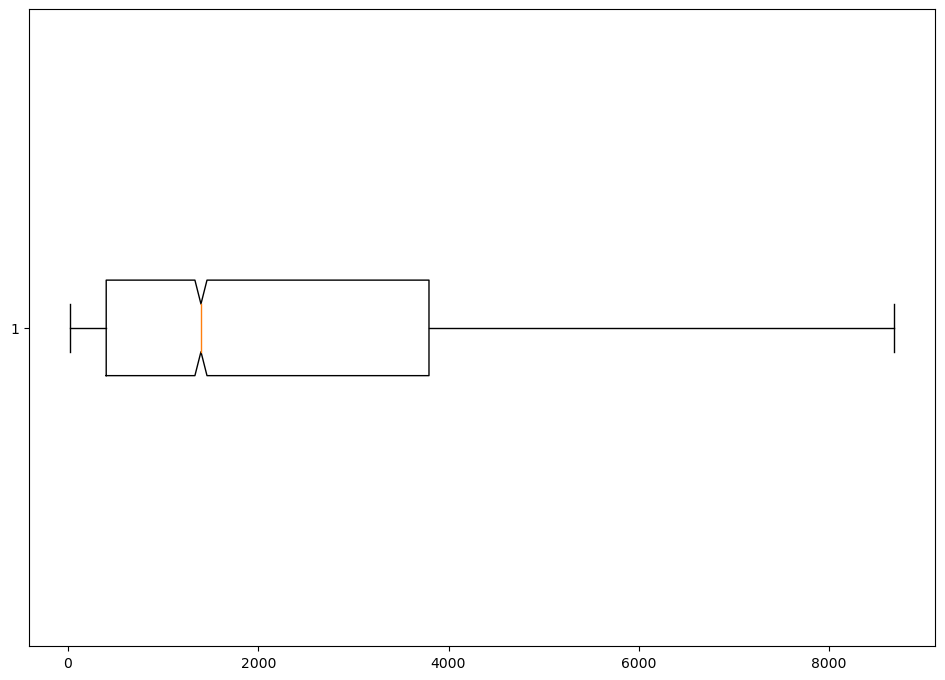

In [285]:
plt.pyplot.boxplot(EDA_charges_total, notch='True', vert=0)

It appears that the last quartile has a much wider range than the others, but there are no extreme outliers.

#### `phone_Service`

In [93]:
# Sample of column entries
df['phone_Service'].head()

0     No
1    Yes
2    Yes
3     No
4    Yes
Name: phone_Service, dtype: object

This appears to be yet another Yes/No column. I imagine this pertains to whether customers have phone service as part of their plans. With the assumption that this is a Yes/No column, let's skip checking type and look at the unique values and their distribution:

In [94]:
# Distribution of values
df['phone_Service'].value_counts()

Yes    6361
No      682
Name: phone_Service, dtype: int64

In [56]:
# Distribution of values as percentage of all entries
df['phone_Service'].value_counts() / len(df) * 100

Yes    90.316626
No      9.683374
Name: phone_Service, dtype: float64

<AxesSubplot: >

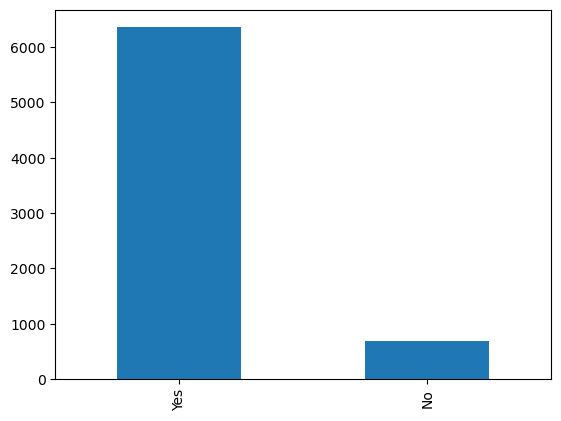

In [95]:
# Plotting the distribution of values
df['phone_Service'].value_counts().plot.bar()

Most customers appear to have phone service.

#### `internet`

In [107]:
# Sample of column entries
df['internet'].head()

0            DSL
1            DSL
2            DSL
3            DSL
4    Fiber optic
Name: internet, dtype: object

This appears to be a string column with options that are not 'Yes' or 'No.' Let's confirm that all objects in this array are strings:

In [54]:
typecheck(df['internet'], 'str')

7043 items are type str, out of 7043


Let's look at unique values and their distribution.

In [58]:
# Distribution of values
df['internet'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: internet, dtype: int64

In [59]:
# Distribution of values as percentage of all entries
df['internet'].value_counts() / len(df) * 100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: internet, dtype: float64

<AxesSubplot: >

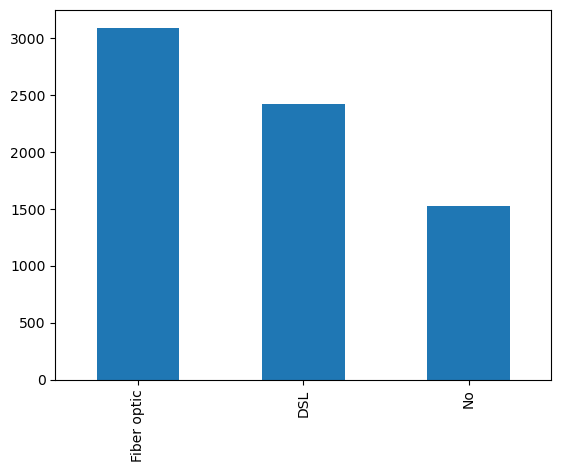

In [110]:
# Plotting the distribution of values
df['internet'].value_counts().plot.bar()

21.67% of customers do not have internet service.

In [64]:
df[df['internet'] != 'No']['internet'].value_counts() / len(df[df['internet'] != 'No']['internet']) * 100

Fiber optic    56.117455
DSL            43.882545
Name: internet, dtype: float64

Among those who have internet service, 56% use fiber optic service, while almost 44% use DSL. 

#### `security_online`

In [111]:
# Sample of column entries
df['security_online'].head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: security_online, dtype: object

This appears to be a string column with Yes/No values. However, let's look at the unique values:

In [65]:
# Distribution of values
df['security_online'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: security_online, dtype: int64

Other than No and Yes, there is one last option for this column: 'No internet service.' This indicates that the customer does not have internet service. Let's confirm that this corresponds 1:1 with the column `internet`:

In [88]:
print(len(df[df['internet'] == 'No']) - len(df[df['security_online'] == 'No internet service']))
print(len(df[df['security_online'] == 'No internet service']) - len(df[df['internet'] == 'No']))

0
0


In [86]:
(df[df['internet'] == 'No'] == df[df['security_online'] == 'No internet service']).value_counts()

customer_ID  gender  senior_citizen  partner  dependents  tenure  phone_Service  multiple_lines  internet  security_online  backup_online  device_protection  tech_support  streaming_tv  streaming_movies  contract_type  paperless_billing  payment_mode  charges_per_month  charges_total  churn
True         True    True            True     True        True    True           True            True      True             True           True               True          True          True              True           True               True          True               True           True     1526
dtype: int64

They appear to correspond. Let's look at their distribution:

In [95]:
# Distribution of values as percentage of all entries
df['security_online'].value_counts() / len(df) * 100

No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: security_online, dtype: float64

<AxesSubplot: >

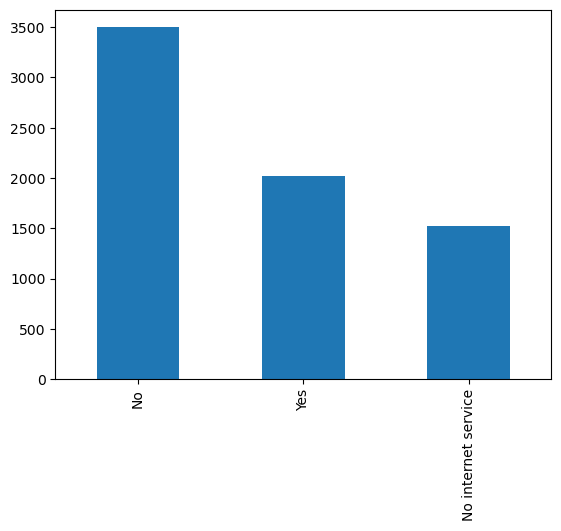

In [113]:
# Plotting the distribution of values
df['security_online'].value_counts().plot.bar()

When one-hot encoding, we may consider recording both 'No' and 'No internet service' as 0.

#### `backup_online`

In [114]:
# Sample of column entries
df['backup_online'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: backup_online, dtype: object

My guess is that this will be similar to `security_online` as it appears to pertain to a service offered to customers with internet access. Checking `value_counts` confirms this:

In [89]:
# Distribution of values
df['backup_online'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: backup_online, dtype: int64

<AxesSubplot: >

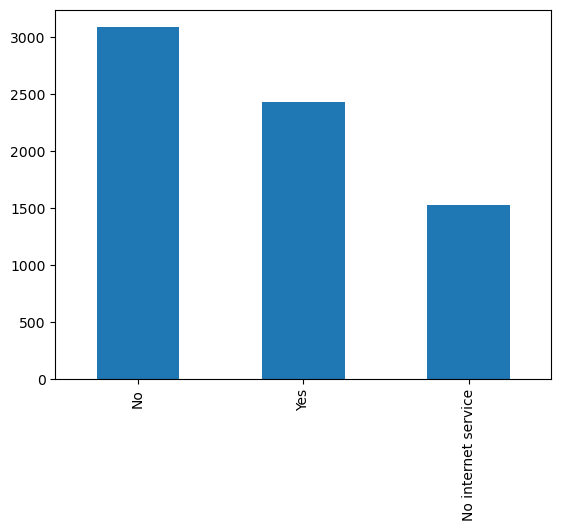

In [116]:
# Plotting the distribution of values
df['backup_online'].value_counts().plot.bar()

#### `device_protection`

In [123]:
# Sample of column entries
df['device_protection'].head()

0     No
1    Yes
2     No
3    Yes
4     No
Name: device_protection, dtype: object

Let's look at the unique values:

In [124]:
# Distribution of values
df['device_protection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [96]:
# Distribution of values as percentage of all entries
df['device_protection'].value_counts() / len(df) * 100

No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: device_protection, dtype: float64

<AxesSubplot: >

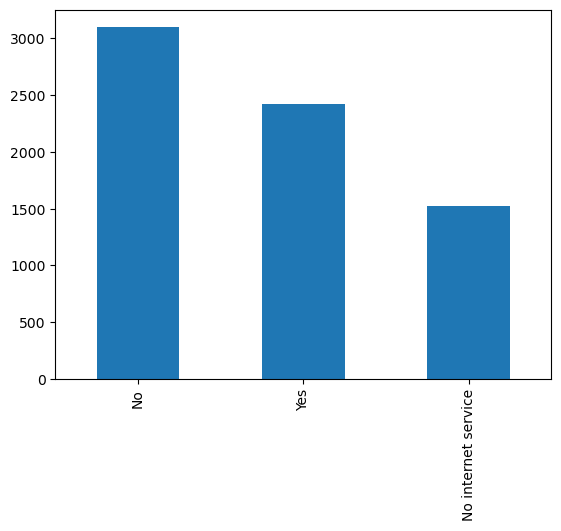

In [125]:
# Plotting the distribution of values
df['device_protection'].value_counts().plot.bar()

#### `tech_support`

In [120]:
# Sample of column entries
df['tech_support'].head()

0     No
1     No
2     No
3    Yes
4     No
Name: tech_support, dtype: object

This appears to be another Yes/No column, presumably for customers with internet service. Let's look at unique values and distribution:

In [121]:
# Distribution of values
df['tech_support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [97]:
# Distribution of values as percentage of all entries
df['tech_support'].value_counts() / len(df) * 100

No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: tech_support, dtype: float64

<AxesSubplot: >

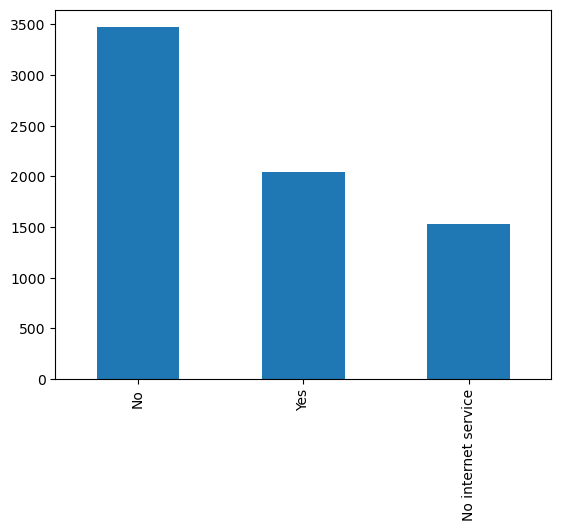

In [122]:
# Plotting the distribution of values
df['tech_support'].value_counts().plot.bar()

Almost half of the customers have internet service but are not signed up for `tech_support`, and around 71% of customers in total do not use it.

#### `streaming_tv`

In [126]:
# Sample of column entries
df['streaming_tv'].head()

0    No
1    No
2    No
3    No
4    No
Name: streaming_tv, dtype: object

This appears to be another Yes/No string column, presumably for customers who have a TV streaming package with their internet plan, and we can check the unique values and distribution:

In [127]:
# Distribution of values
df['streaming_tv'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

In [98]:
# Distribution of values as percentage of all entries
df['streaming_tv'].value_counts() / len(df) * 100

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: streaming_tv, dtype: float64

<AxesSubplot: >

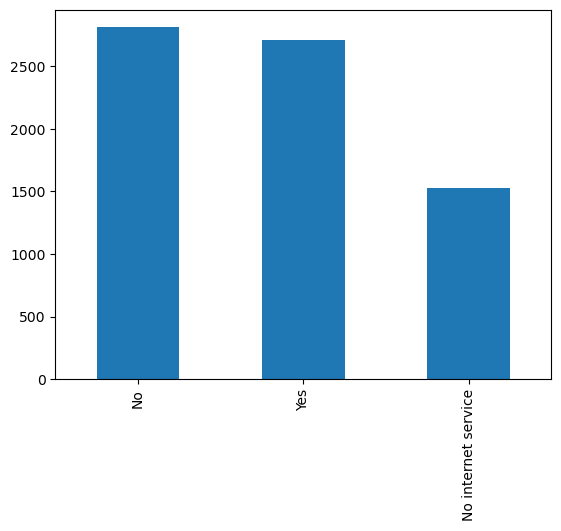

In [90]:
# Plotting the distribution of values
df['streaming_tv'].value_counts().plot.bar()

#### `streaming_movies`

In [129]:
# Sample of column entries
df['streaming_movies'].head()

0    No
1    No
2    No
3    No
4    No
Name: streaming_movies, dtype: object

This appears to be another Yes/No string column, presumably referring to customers who sign up for a movie streaming service addon with their internet plan, and we can check the unique values:

In [91]:
# Distribution of values
df['streaming_movies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

In [99]:
# Distribution of values as percentage of all entries
df['streaming_movies'].value_counts() / len(df) * 100

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: streaming_movies, dtype: float64

<AxesSubplot: >

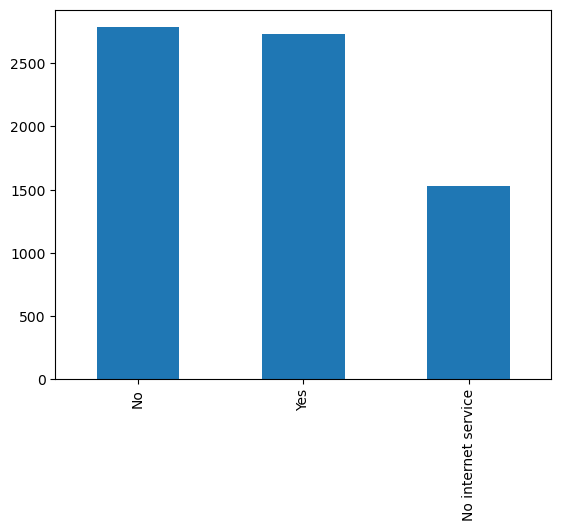

In [92]:
# Plotting the distribution of values
df['streaming_movies'].value_counts().plot.bar()

#### `contract_type`

In [132]:
# Sample of column entries
df['contract_type'].head()

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: contract_type, dtype: object

This appears to be a string column with different options. Let's confirm that all items are strings:

In [55]:
typecheck(df['contract_type'], 'str')

7043 items are type str, out of 7043


Let's use `value_counts` to learn about unique values and their distribution in the dataset.

In [133]:
# Distribution of values
df['contract_type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

These appear to be contract types.

<AxesSubplot: >

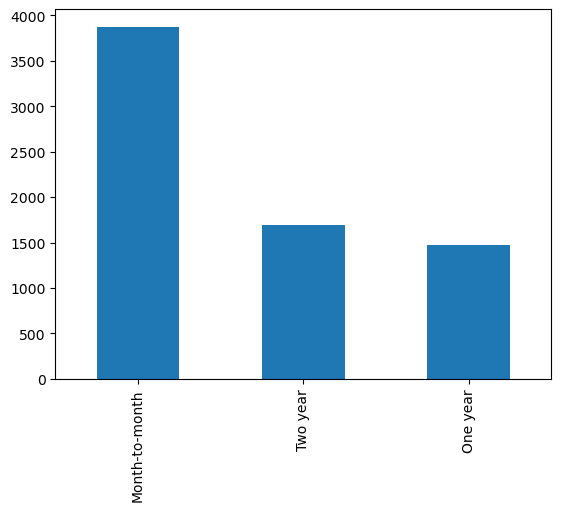

In [134]:
# Plotting the distribution of values
df['contract_type'].value_counts().plot.bar()

Most customers are on monthly contracts.

#### `paperless_billing`

In [135]:
# Sample of column entries
df['paperless_billing'].head()

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: paperless_billing, dtype: object

This appears to be a Yes/No column. Let's check if all items are strings:

In [56]:
typecheck(df['paperless_billing'], 'str')

7043 items are type str, out of 7043


Let's look at unique values and distribution:

In [136]:
# Distribution of values
df['paperless_billing'].value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [100]:
# Distribution of values as percentage of all entries
df['paperless_billing'].value_counts() / len(df) * 100

Yes    59.221922
No     40.778078
Name: paperless_billing, dtype: float64

<AxesSubplot: >

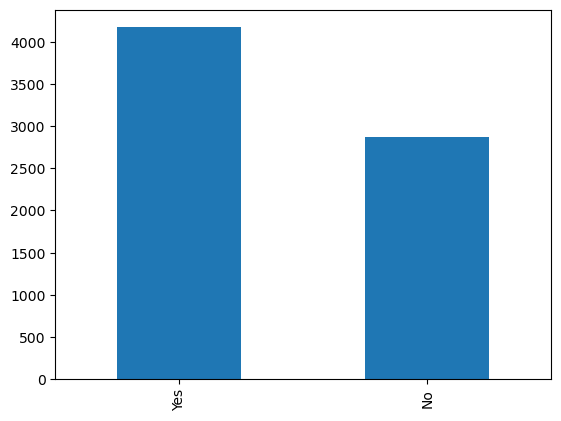

In [138]:
# Plotting the distribution of values
df['paperless_billing'].value_counts().plot.bar()

It appears that almost 3/5 of customers use paperless billing.

#### `payment_mode`

In [139]:
# Sample of column entries
df['payment_mode'].head()

0             Electronic check
1                 Mailed check
2                 Mailed check
3    Bank transfer (automatic)
4             Electronic check
Name: payment_mode, dtype: object

This appears to be a string column with multiple options for different payment modes used by customers. Let's check what the item dtypes are:

In [57]:
typecheck(df['payment_mode'], 'str')

7043 items are type str, out of 7043


Let's look at unique values and the distribution of this series:

In [140]:
# Distribution of values
df['payment_mode'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_mode, dtype: int64

In [102]:
# Distribution of values as percentage of all entries
df['payment_mode'].value_counts() / len(df) * 100

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: payment_mode, dtype: float64

<AxesSubplot: >

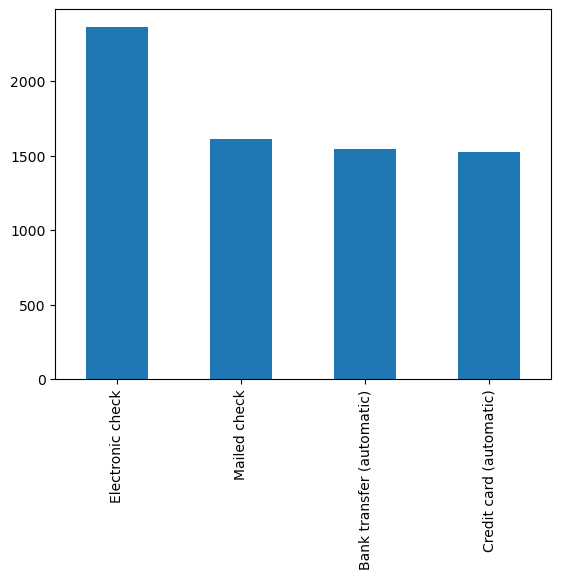

In [141]:
# Plotting the distribution of values
df['payment_mode'].value_counts().plot.bar()

Electronic check appears to be the most popu.ar, with other payment types being mostly evenly divided.

#### `charges_per_month`

In [16]:
# Sample of column entries
df['charges_per_month'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: charges_per_month, dtype: float64

This is our second numeric column, this time with a dtype of `float64`. This probably refers to how much customers are charged each month, with the unit presumably being dollars. We know from earlier that there are no null values in this column, so let's look at descriptive statistics:

In [17]:
df['charges_per_month'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: charges_per_month, dtype: float64

Let's see the distribution of values across the dataset.

<AxesSubplot: xlabel='charges_per_month', ylabel='Count'>

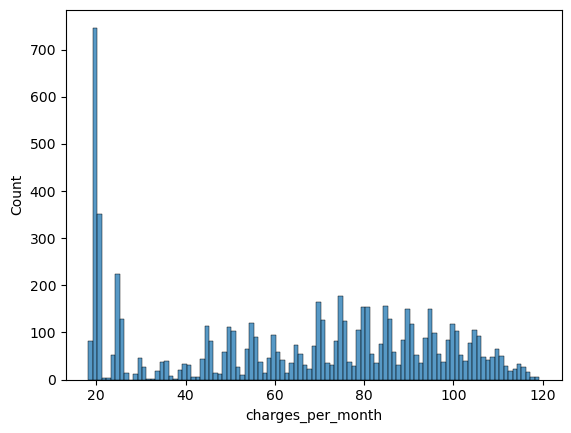

In [18]:
sns.histplot(data=(df['charges_per_month']), binwidth=1)

There appear to be multiple peaks in this histogram, which suggests that there are set plan prices with slight variations around each peak possibly attributable to discounts, administrative fees, or additional services. Let's calculate **skewness**.

In [26]:
df['charges_per_month'].skew()

-0.22052443394398033

The distribution is negatively skewed, meaning that there is more weight towards the higher end of the distribution. If we eliminate the large number of customer who have monthly charges not more than 25 (without this segment the distribution looks more bell-shaped), this value is even more negative:

In [31]:
df[df['charges_per_month'] > 25]['charges_per_month'].skew()

-0.38795401881097447

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [34]:
scipy.stats.kurtosis(df['charges_per_month'])

-1.2572191009381857

Kurtosis is negative, indicating that the distribution is relatively flat.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

{'whiskers': [<matplotlib.lines.Line2D at 0x165d94a00>,
 'caps': [<matplotlib.lines.Line2D at 0x165d94f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x165d94760>],
 'medians': [<matplotlib.lines.Line2D at 0x165d95480>],
 'fliers': [<matplotlib.lines.Line2D at 0x165d95720>],
 'means': []}

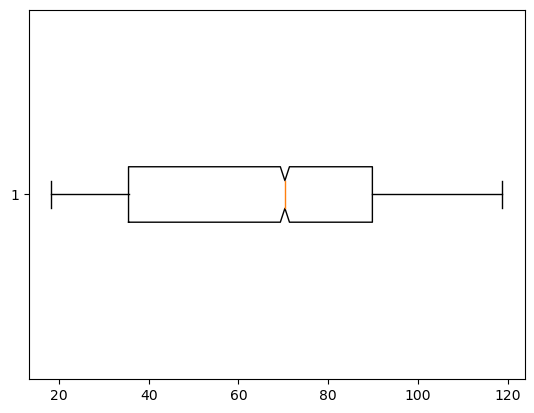

In [105]:
plt.pyplot.boxplot(df['charges_per_month'], notch='True', vert=0)

There do not appear to be extreme outliers in this variable.

#### `charges_total`

In [35]:
# Sample of column entries
df['charges_total'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: charges_total, dtype: object

This appears to also be about how much the customer is charged, and probably means how much the customer has been charged across the lifetime of their tenure. Let's look at descriptive statistics:

In [36]:
df['charges_total'].describe()

count     7043
unique    6531
top           
freq        11
Name: charges_total, dtype: object

This is interesting; `describe` yields a different descriptive statistics format than `charges_per_month`, suggesting that this column when read as a series is not in a numeric datatype. Indeed, the column's dtype is `object`. Before I run `typecheck`, let's check the dtype of the first item:

In [39]:
type(df['charges_total'].values.item(0))

float

Interestingly, this item has a `float` dtype. We should run `typecheck` to see if this is the case for all items:

In [63]:
typecheck(df['charges_total'], 'float')

There is an item in position 46 with value 97 and type <class 'int'>
There is an item in position 62 with value 2962 and type <class 'int'>
There is an item in position 72 with value 7099 and type <class 'int'>
There is an item in position 87 with value 1057 and type <class 'int'>
There is an item in position 93 with value 7107 and type <class 'int'>
There is an item in position 158 with value 1024 and type <class 'int'>
There is an item in position 166 with value 273 and type <class 'int'>
There is an item in position 179 with value 1252 and type <class 'int'>
There is an item in position 191 with value 531 and type <class 'int'>
There is an item in position 234 with value 702 and type <class 'int'>
There is an item in position 287 with value 70 and type <class 'int'>
There is an item in position 303 with value 4109 and type <class 'int'>
There is an item in position 321 with value 4264 and type <class 'int'>
There is an item in position 339 with value 6603 and type <class 'int'>
Ther

Judging from the print output when read in a text editor, it appears that many items were in dtype `int`. However, there is also a small number of items with type `str`, but with only a space ' ' as its value.

In [77]:
typecheck(df['charges_total'], 'float', error_msg=False)
typecheck(df['charges_total'], 'int', error_msg=False)
typecheck(df['charges_total'], 'str', error_msg=False)

6708 items are type float, out of 7043
324 items are type int, out of 7043
11 items are type str, out of 7043


**We will have to address this issue in data cleaning,** but in the meantime let's make a duplicate series that drops all items with the `str` entry ' ' and converts all remaining items to float:

In [91]:
EDA_charges_total = pd.to_numeric(df.drop(index = df[df['charges_total']==' '].index, axis=0)['charges_total'])
EDA_charges_total

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: charges_total, Length: 7032, dtype: float64

Let's look at descriptive statistics for this new series:

In [92]:
EDA_charges_total.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: charges_total, dtype: float64

Let's see the distribution of values across the dataset.

<AxesSubplot: xlabel='charges_total', ylabel='Count'>

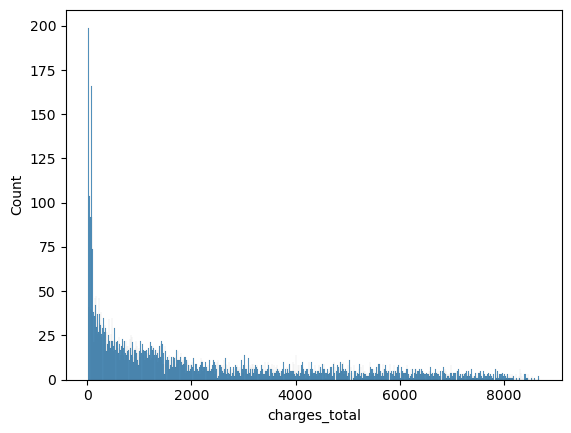

In [95]:
sns.histplot(data=EDA_charges_total, binwidth=10)

There appears to be a very sharp left tail, suggeting that a large proportion of customers have a relatively low `charges_total` value. The tail is much longer at the left end. Let's calculate **skewness.**

In [97]:
EDA_charges_total.skew()

0.9616424997242504

The distribution is positively skewed, or skewed to the right.

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [98]:
scipy.stats.kurtosis(EDA_charges_total)

-0.23248709758655117

The kurtosis is negative.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

{'whiskers': [<matplotlib.lines.Line2D at 0x165d1a7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x165d1ad10>,
 'boxes': [<matplotlib.lines.Line2D at 0x165d1a530>],
 'medians': [<matplotlib.lines.Line2D at 0x165d1b250>],
 'fliers': [<matplotlib.lines.Line2D at 0x165d1b4f0>],
 'means': []}

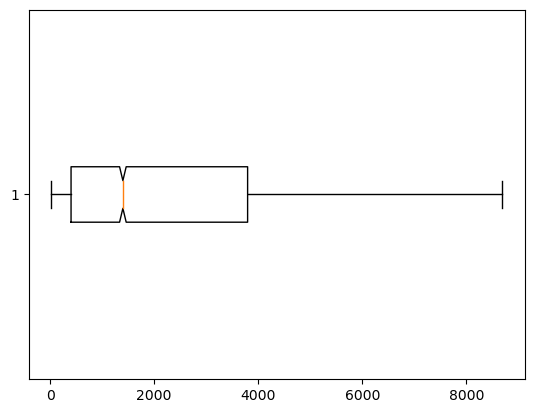

In [104]:
plt.pyplot.boxplot(EDA_charges_total, notch='True', vert=0)

It appears that the last quartile has a much wider range than the others, but there are no extreme outliers.

#### `churn`

In [142]:
# Sample of column entries
df['churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: churn, dtype: object

This appears to be our **target variable**: the one we will attempt to model later on. We are interested in how other variables affect churn, as it could inform customer retention programme design or create insights about issues in how the telco operates. This appears to be a Yes/No column. Let's confirm all items are the same type:

In [58]:
typecheck(df['churn'], 'str')

7043 items are type str, out of 7043


Let's look at the distribution of entries:

In [143]:
# Distribution of entries
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [7]:
# Distribution of values as percentage of all entries
df['churn'].value_counts() / len(df) * 100

No     73.463013
Yes    26.536987
Name: churn, dtype: float64

<AxesSubplot: >

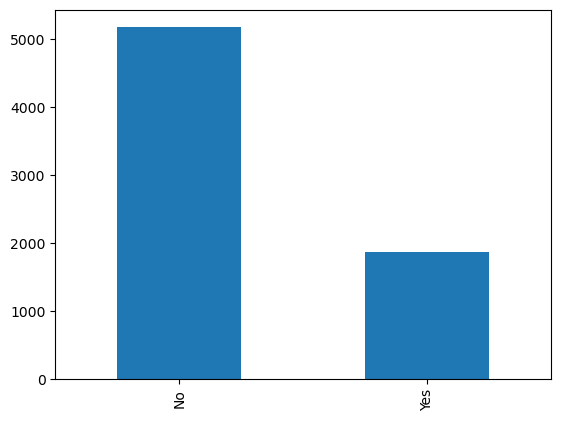

In [8]:
# Plotting the distribution of values
df['churn'].value_counts().plot.bar()

##

## Data cleaning

Now that we have understood each of the variables, we must make some decisions about how the data must be manipulated and cleaned before doing bivariate analysis.

#### Missing values

We learned earlier that there are missing values in `charges_total`. These shall be dropped.

#### Categorical data consistency

By nature of their content, categorical variables in this dataset include the target variable `churn` and the variables `gender`, `senior_citizen`, `partner`, `dependencies`, `phone_Service`, `multiple_lines`, `internet`, `security_online`, `backup_online`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, `contract_type`, `paperless_billing`, and `payment_mode`.

Of these:
<ul>
    <li>`gender`, `internet`, `contract_type` have specific options.
    <li>All of the remaining have values that are some variation of Yes/No.</li>
    <li>For some reason, `senior_citizen' has values of 0 or 1, while the other columns have string values with `Yes` or `No`.</li>
    <li>`multiple_lines` has an additional option for 'No phone service'.</li>
    <li>`security_online`, `backup_online`, `device_protection`, `tech_support`, `streaming_tv`, and `streaming_movies` having an additional option for 'No internet service.'</li>
</ul>

I decided to use **integer values 0 and 1** to represent all of them. I will create two dataframes: `data` which will have all of the Yes/No columns represented by 1s and 0s but keep the original values for `gender`, `internet` and `contract_type` for the purposes of enabling graphical visualisations, and `data_ohe` which will use **one-hot encoding* to represent all categorical values with 0s and 1s.

Because you can get the information about whether or not a customer has phone or internet service from the appropriate columns, the values 'No phone service' and 'No internet service' will be eliminated and replaced by 0 for No. Users of these dataframes for future analysis should be careful to make sure to subset the data as appropriate if this will affect their calculations.


#### Gender

Gender is a very important customer characteristic, and therefore it is important that this information is well-represented. Let's recall, however, the unique values in this variable and their distribution across the dataset:

In [106]:
# Distribution of values
df['gender'].value_counts()

Male                 3553
Female               3484
Prefer not to say       6
Name: gender, dtype: int64

Only 6 values out of 7043 are 'Prefer not to say.' These 6 entries will not be representative of any population which might choose not to disclose their gender, which might be because of personal concern for privacy or perhaps a nonbinary gender identity. As the intent behind this value is unclear and meaningful patterns may not be uncovered through analysing this group, we can safely drop these values.

Furthermore, it is [common](https://web.pdx.edu/~newsomj/pa551/lecture1.htm) to represent male as 1 and female as 0 when using binary, so I will follow that precedent.

#### Executing the data cleaning

Taking these decisions into account, let's start data cleaning:

In [3]:
# Eliminating items with str value ' ' in charges_total and with gender as 'Prefer not to say'
data = df.drop(index = df[df['charges_total']==' '].index, axis=0)
data = data.drop(index = df[df['gender']=='Prefer not to say'].index, axis=0)
data

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Making categorical data consistent

In [4]:
data = data.replace({'Yes' : 1, 'No' : 0, 'No phone service' : 0, 'No internet service' : 0})
data['internet'] = df['internet'] # 'No' values in this column need to be intact for a one-hot encoder to work.
data

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [221]:
data.dtypes

customer_ID           object
gender                object
senior_citizen         int64
partner                int64
dependents             int64
tenure                 int64
phone_Service          int64
multiple_lines         int64
internet              object
security_online        int64
backup_online          int64
device_protection      int64
tech_support           int64
streaming_tv           int64
streaming_movies       int64
contract_type         object
paperless_billing      int64
payment_mode          object
charges_per_month    float64
charges_total        float64
churn                  int64
dtype: object

#### One-hot encoding

In [5]:
"""
This line of code:
1) drops customer_ID from the dataframe data, so that it will not be one-hot encoded;
2) uses pd.get_dummies to one-hot encode the remaining variables;
3) joins the resulting dataframe with a dataframe consisting only of customer_ID, so that the resulting dataframe
   has the customer ID, the one-hot encoded categorical information, and numerical variables.
"""
data_ohe = pd.DataFrame(data['customer_ID']).join(pd.get_dummies(data.drop(columns=['customer_ID'])))
data_ohe

,customer_ID,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,security_online,backup_online,device_protection,...,internet_DSL,internet_Fiber optic,internet_No,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_mode_Bank transfer (automatic),payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


#### Standardisation

For our later data visualisations, and for the purposes of model-building or other activities that may be sensitive to Euclidean distance, let's proceed to make versions of `data` and `data_ohe` with values standardised.

In [6]:
# Using sklearn StandardScaler
from sklearn import preprocessing
scale = sklearn.preprocessing.StandardScaler()

# Standardising data_sd
data_sd = data
data_sd['tenure'] = scale.fit_transform(data[['tenure']])
data_sd['charges_per_month'] = scale.fit_transform(data[['charges_per_month']])
data_sd['charges_total'] = scale.fit_transform(data[['charges_total']])

data_sd

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,1,0,-1.279842,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,-1.161795,-0.994037,0
1,5575-GNVDE,Male,0,0,0,0.064486,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,-0.260819,-0.173509,0
2,3668-QPYBK,Male,0,0,0,-1.239105,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,-0.363883,-0.959489,1
3,7795-CFOCW,Male,0,0,0,0.512595,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),-0.747878,-0.195019,0
4,9237-HQITU,Female,0,0,0,-1.239105,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,0.196318,-0.940295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,-0.342886,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,0.665091,-0.128945,0
7039,2234-XADUH,Female,0,1,1,1.612500,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),1.276823,2.241501,0
7040,4801-JZAZL,Female,0,1,1,-0.872470,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,-1.170106,-0.854344,0
7041,8361-LTMKD,Male,1,1,0,-1.157630,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,0.319329,-0.871927,1


In [7]:
# Standardising data_ohe
data_ohe_sd = data_ohe
data_ohe_sd['tenure'] = scale.fit_transform(data_ohe[['tenure']])
data_ohe_sd['charges_per_month'] = scale.fit_transform(data_ohe[['charges_per_month']])
data_ohe_sd['charges_total'] = scale.fit_transform(data_ohe[['charges_total']])

data_ohe_sd

,customer_ID,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,security_online,backup_online,device_protection,...,internet_DSL,internet_Fiber optic,internet_No,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_mode_Bank transfer (automatic),payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check
0,7590-VHVEG,0,1,0,-1.279842,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0.064486,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,-1.239105,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0.512595,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,-1.239105,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,-0.342886,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,1,1,1.612500,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,0,1,1,-0.872470,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,0,-1.157630,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


## Bivariate analysis

#### General overview (correlations)

To get a general glimpse of which pairs of variables are likely related (though this will not prove anything), I will generate a correlation matrix.

In [269]:
data.corr(numeric_only=True)

,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,charges_per_month,charges_total,churn
senior_citizen,1.000000,0.017230,-0.210527,0.015774,0.008309,0.143132,-0.038293,0.066687,0.059536,-0.060833,0.105593,0.119995,0.156509,0.220071,0.102580,0.150686
partner,0.017230,1.000000,0.452164,0.382081,0.018721,0.142306,0.142595,0.141787,0.153503,0.120664,0.124162,0.117787,-0.014165,0.097393,0.318940,-0.150430
dependents,-0.210527,0.452164,1.000000,0.163630,-0.001516,-0.024706,0.079891,0.023672,0.013922,0.063342,-0.016286,-0.038821,-0.110735,-0.112956,0.064542,-0.163364
tenure,0.015774,0.382081,0.163630,1.000000,0.007754,0.332146,0.328395,0.360889,0.361539,0.325554,0.280305,0.285103,0.004625,0.246647,0.825897,-0.354885
phone_Service,0.008309,0.018721,-0.001516,0.007754,1.000000,0.279396,-0.092351,-0.052535,-0.070497,-0.095351,-0.020865,-0.033965,0.015996,0.247826,0.112795,0.011373
multiple_lines,0.143132,0.142306,-0.024706,0.332146,0.279396,1.000000,0.097961,0.201801,0.201304,0.100570,0.257713,0.258515,0.163517,0.490430,0.468596,0.039397
security_online,-0.038293,0.142595,0.079891,0.328395,-0.092351,0.097961,1.000000,0.283197,0.274775,0.355251,0.175562,0.186847,-0.004835,0.295891,0.412377,-0.172071
backup_online,0.066687,0.141787,0.023672,0.360889,-0.052535,0.201801,0.283197,1.000000,0.303102,0.293866,0.281858,0.274158,0.126961,0.441321,0.509790,-0.083283
device_protection,0.059536,0.153503,0.013922,0.361539,-0.070497,0.201304,0.274775,0.303102,1.000000,0.333036,0.389662,0.402057,0.103965,0.482330,0.522814,-0.066476
tech_support,-0.060833,0.120664,0.063342,0.325554,-0.095351,0.100570,0.355251,0.293866,0.333036,1.000000,0.277859,0.280461,0.037823,0.338632,0.433325,-0.164743


Here is a visualisation of this correlation matrix:

<AxesSubplot: >

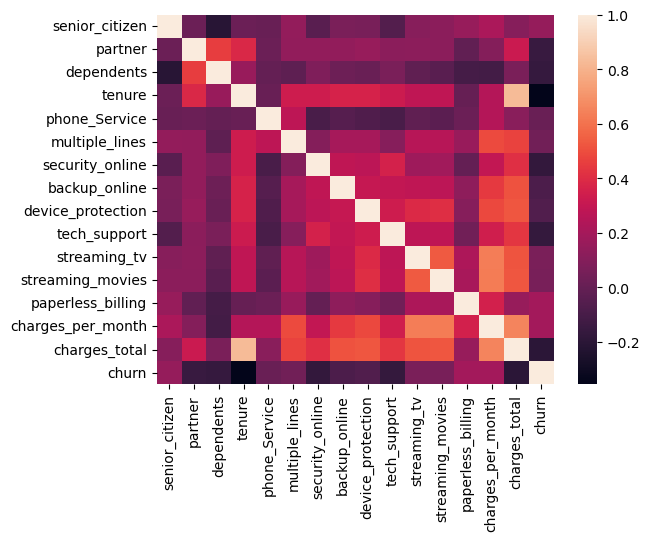

In [270]:
sns.heatmap(data.corr(numeric_only=True))

Here are the other variables in relation to `churn`:

In [277]:
data.corr(numeric_only=True)['churn']

senior_citizen       0.150686
partner             -0.150430
dependents          -0.163364
tenure              -0.354885
phone_Service        0.011373
multiple_lines       0.039397
security_online     -0.172071
backup_online       -0.083283
device_protection   -0.066476
tech_support        -0.164743
streaming_tv         0.063284
streaming_movies     0.060228
paperless_billing    0.191333
charges_per_month    0.192341
charges_total       -0.200578
churn                1.000000
Name: churn, dtype: float64

From first glance, especially correlated pairs include:

<ul>
    <li>`tenure` and `charges_total`, which are expected to be dependent as (obviously) people who have subscribed for longer will tend to have paid more over time</li>
    <li>`streaming_tv` and `streaming_movies` with each other and `charges_per_month`, which makes sense as these services are likely to require add-on charge</li>
</ul>

**There do not appear to be strong correlations with `churn` at the moment.**

We can try generating a correlation matrix with the one-hot encoded version:

In [271]:
data_ohe.corr(numeric_only=True)

,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,security_online,backup_online,device_protection,tech_support,...,internet_DSL,internet_Fiber optic,internet_No,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_mode_Bank transfer (automatic),payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check
senior_citizen,1.000000,0.017230,-0.210527,0.015774,0.008309,0.143132,-0.038293,0.066687,0.059536,-0.060833,...,-0.108338,0.255102,-0.182645,0.137907,-0.046408,-0.116442,-0.016290,-0.024415,0.171256,-0.152876
partner,0.017230,1.000000,0.452164,0.382081,0.018721,0.142306,0.142595,0.141787,0.153503,0.120664,...,-0.001231,0.000877,0.000363,-0.280963,0.083439,0.247815,0.111456,0.082351,-0.083156,-0.097117
dependents,-0.210527,0.452164,1.000000,0.163630,-0.001516,-0.024706,0.079891,0.023672,0.013922,0.063342,...,0.051654,-0.164629,0.138937,-0.230657,0.069956,0.202057,0.052090,0.060860,-0.148946,0.056653
tenure,0.015774,0.382081,0.163630,1.000000,0.007754,0.332146,0.328395,0.360889,0.361539,0.325554,...,0.014313,0.017463,-0.037571,-0.649545,0.202114,0.564133,0.243717,0.232996,-0.210508,-0.232011
phone_Service,0.008309,0.018721,-0.001516,0.007754,1.000000,0.279396,-0.092351,-0.052535,-0.070497,-0.095351,...,-0.452092,0.290054,0.171780,-0.000874,-0.003479,0.004332,0.008060,-0.007143,0.002507,-0.003764
multiple_lines,0.143132,0.142306,-0.024706,0.332146,0.279396,1.000000,0.097961,0.201801,0.201304,0.100570,...,-0.199883,0.365858,-0.210597,-0.088665,-0.003639,0.106756,0.075158,0.060034,0.083391,-0.227010
security_online,-0.038293,0.142595,0.079891,0.328395,-0.092351,0.097961,1.000000,0.283197,0.274775,0.355251,...,0.320960,-0.031264,-0.332577,-0.247512,0.100836,0.192274,0.094310,0.115435,-0.112381,-0.079757
backup_online,0.066687,0.141787,0.023672,0.360889,-0.052535,0.201801,0.283197,1.000000,0.303102,0.293866,...,0.157316,0.165482,-0.381046,-0.164323,0.083961,0.111441,0.086524,0.090765,-0.000794,-0.173557
device_protection,0.059536,0.153503,0.013922,0.361539,-0.070497,0.201304,0.274775,0.303102,1.000000,0.333036,...,0.145692,0.175907,-0.380206,-0.225969,0.102778,0.165329,0.083350,0.110851,-0.003741,-0.186824
tech_support,-0.060833,0.120664,0.063342,0.325554,-0.095351,0.100570,0.355251,0.293866,0.333036,1.000000,...,0.312357,-0.020246,-0.335939,-0.285530,0.096501,0.240692,0.100456,0.117020,-0.115060,-0.084358


Let's try visualising this matrix with a heatmap (figure sizing code from [Stack Overflow](https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot)):

<AxesSubplot: >

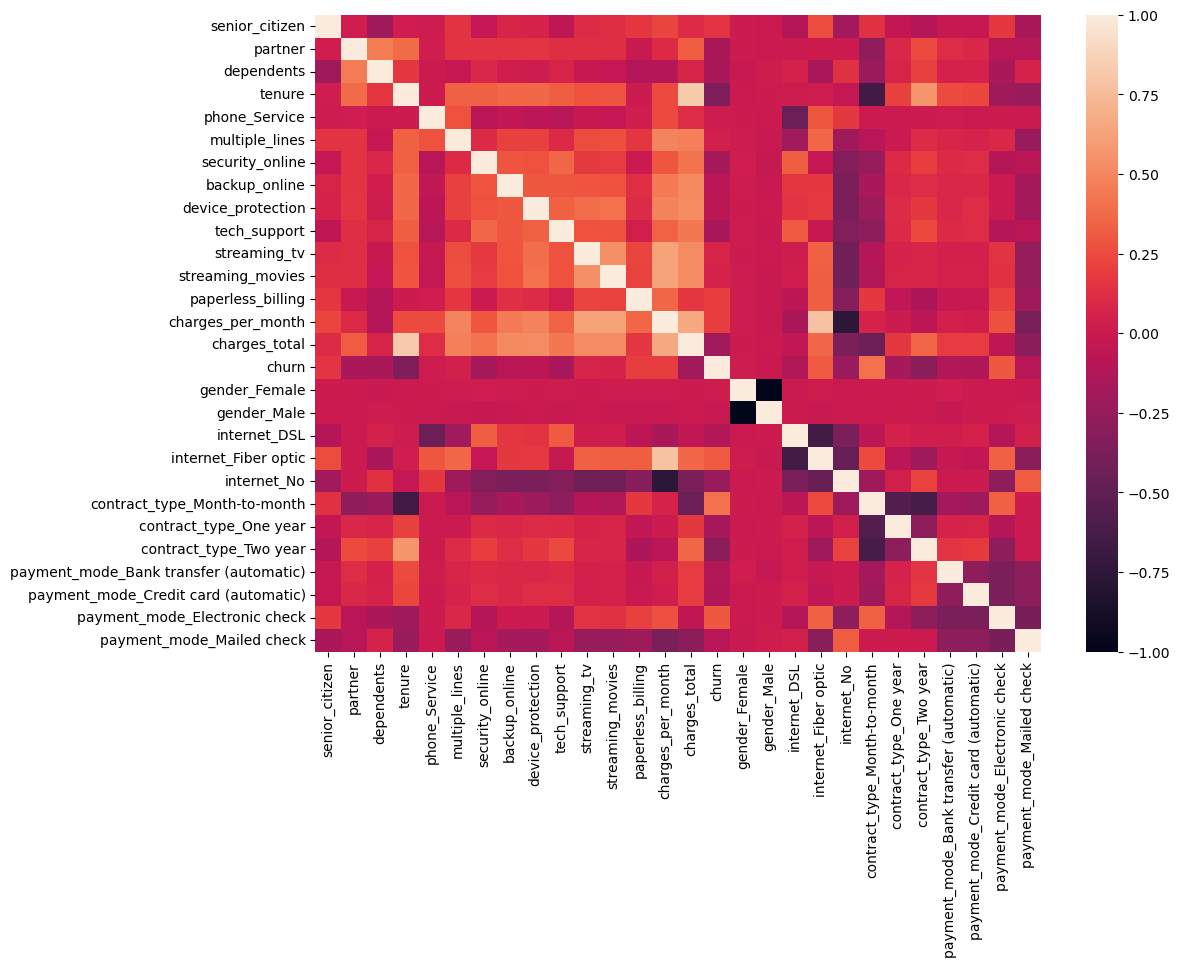

In [14]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.heatmap(data_ohe.corr(numeric_only=True))

Here are the other variables in relation to `churn`:

In [278]:
data_ohe.corr(numeric_only=True)['churn']

senior_citizen                            0.150686
partner                                  -0.150430
dependents                               -0.163364
tenure                                   -0.354885
phone_Service                             0.011373
multiple_lines                            0.039397
security_online                          -0.172071
backup_online                            -0.083283
device_protection                        -0.066476
tech_support                             -0.164743
streaming_tv                              0.063284
streaming_movies                          0.060228
paperless_billing                         0.191333
charges_per_month                         0.192341
charges_total                            -0.200578
churn                                     1.000000
gender_Female                             0.008723
gender_Male                              -0.008723
internet_DSL                             -0.123800
internet_Fiber optic           

From first glance, especially correlated pairs include:

<ul>
    <li>`internet_Fiber optic` and `charges_per_month`, which makes sense</li>
    <li>`contract_type_Two year` and `tenure`, which is clearly dependent</li>
</ul>

A number of variables seem to be more correlated with `churn` than others, *relatively speaking*:

**Positive correlation**
<ul>
    <li>`contract_type_Month-to-Month`</li>
    <li>`payment_mode_Electronic check`</li>
    <li>`internet_Fiber optic`</li>
</ul>

**Negative correlation**
<ul>
    <li>`tenure`</li>
    <li>`contract_type_Two year`</li>
    <li>`internet_No`</li>
</ul>

#### Numeric-to-numeric

Let's look again at the correlations between the numeric variables:

In [17]:
data[['tenure', 'charges_per_month', 'charges_total']].corr()

,tenure,charges_per_month,charges_total
tenure,1.000000,0.246647,0.825897
charges_per_month,0.246647,1.000000,0.650808
charges_total,0.825897,0.650808,1.000000


Let's look at scatterplots visualising the relationships between the numeric variables.

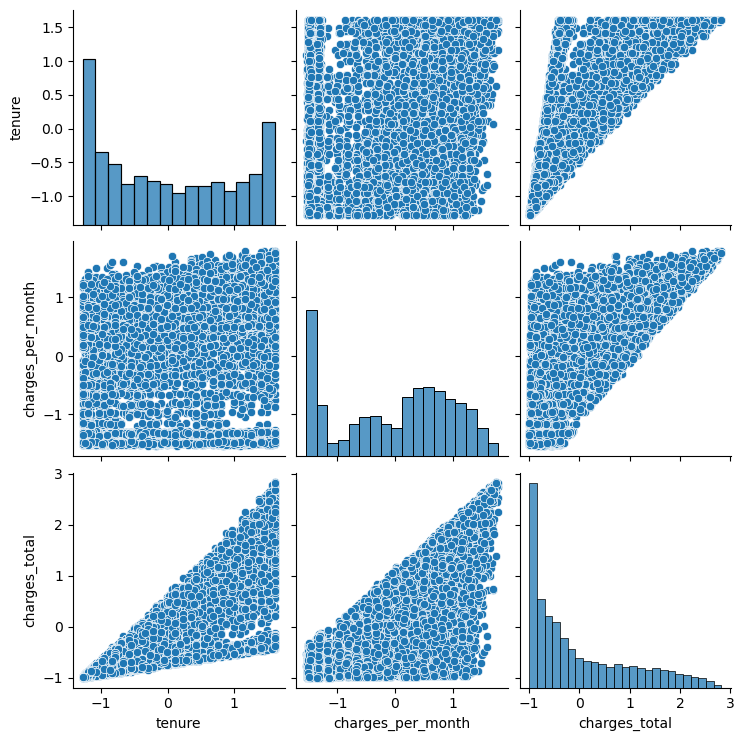

In [15]:
sns.pairplot(data[['tenure', 'charges_per_month', 'charges_total']])

`tenure` and `charges_total` appear to be most related, although there is some visible heteroscedasticity. `tenure` and `charges_per_month` appear to be most weakly related.

#### Numeric-categorical analysis

Let's look at our numerical variables in relation to churn:

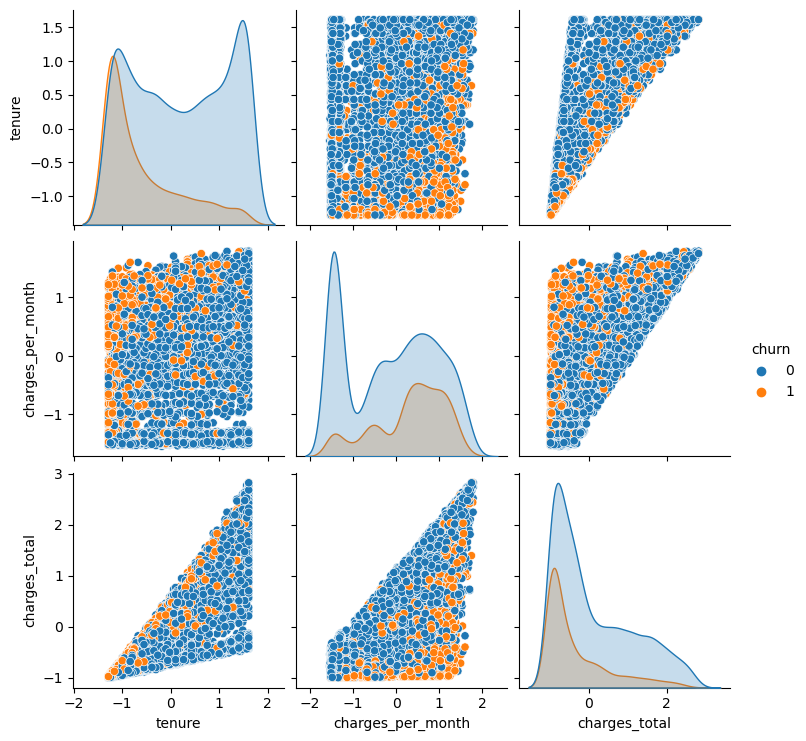

In [41]:
sns.pairplot(data[['tenure', 'charges_per_month', 'charges_total', 'churn']], hue='churn')

Let's look at them in relation to gender:

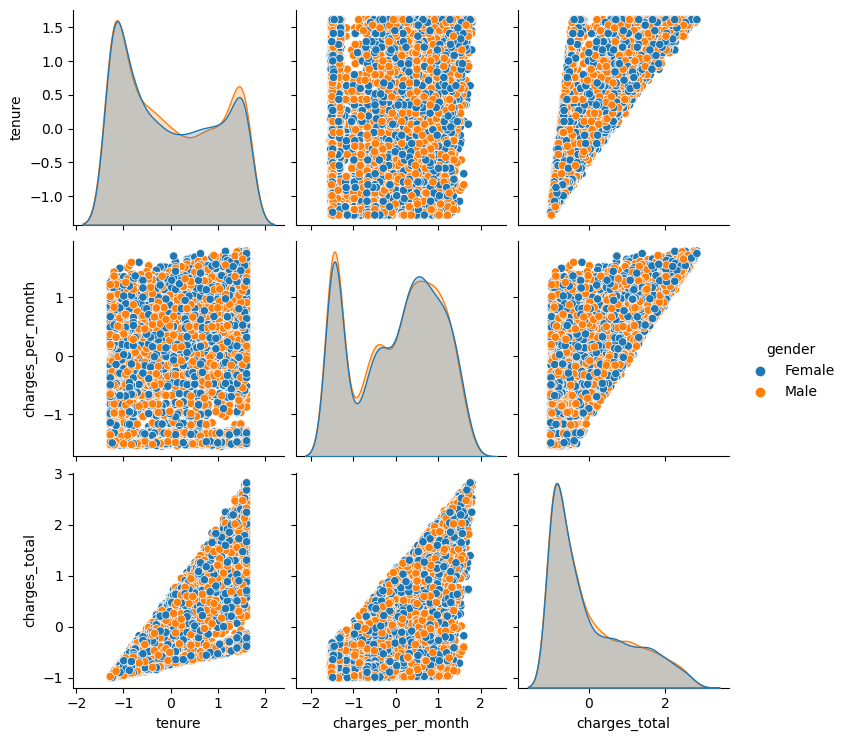

In [42]:
sns.pairplot(data[['tenure', 'charges_per_month', 'charges_total', 'gender']], hue='gender')

Numeric variables did not seem to impact churn significantly.

Of course, `churn` and `tenure` appear to have an inverse relationship.

#### Categorical-categorical analysis

Let's look at the relationships between categories:

Text(0.5, 1.0, 'Churn and Payment Mode')

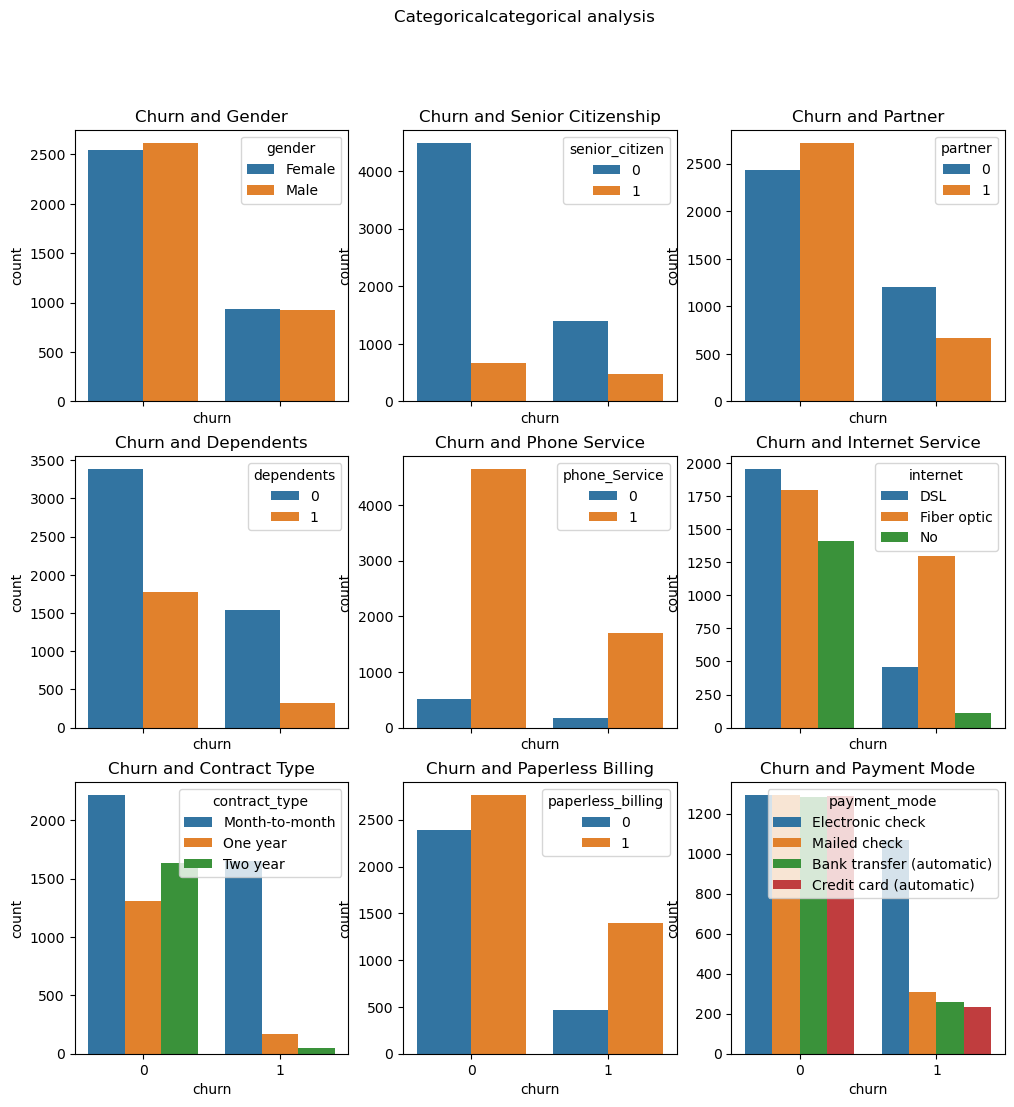

In [49]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(12,12))
fig.suptitle('Categoricalcategorical analysis')

sns.countplot(ax=axes[0,0], data=data, x='churn', hue='gender')
axes[0,0].set_title('Churn and Gender')

sns.countplot(ax=axes[0,1], data=data, x='churn', hue='senior_citizen')
axes[0,1].set_title('Churn and Senior Citizenship')

sns.countplot(ax=axes[0,2], data=data, x='churn', hue='partner')
axes[0,2].set_title('Churn and Partner')

sns.countplot(ax=axes[1,0], data=data, x='churn', hue='dependents')
axes[1,0].set_title('Churn and Dependents')

sns.countplot(ax=axes[1,1], data=data, x='churn', hue='phone_Service')
axes[1,1].set_title('Churn and Phone Service')

sns.countplot(ax=axes[1,2], data=data, x='churn', hue='internet')
axes[1,2].set_title('Churn and Internet Service')

sns.countplot(ax=axes[2,0], data=data, x='churn', hue='contract_type')
axes[2,0].set_title('Churn and Contract Type')

sns.countplot(ax=axes[2,1], data=data, x='churn', hue='paperless_billing')
axes[2,1].set_title('Churn and Paperless Billing')

sns.countplot(ax=axes[2,2], data=data, x='churn', hue='payment_mode')
axes[2,2].set_title('Churn and Payment Mode')

We can see that:

<ul>
    <li>Customers with month-to-month contracts, electronic check as their payment mode, and fiber optic internet connections appear significantly more likely to churn than not.</li>
    <li>Gender, senior citizenship, and family configuration did not seem to affect churn as much.</li>
</ul>